# Multiclass Classification Practice

In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import sys
import os

sys.path.append(os.path.relpath("../"))
from helper_functions import *

In [6]:
class Multiclass(nn.Module):
    def __init__(self, input, output, HIDDEN_UNITS=100):
        super().__init__()

        self.sequence = nn.Sequential(
            nn.Linear(in_features=input, out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_UNITS, out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_UNITS, out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_UNITS, out_features=HIDDEN_UNITS),
            nn.ReLU(),
            nn.Linear(in_features=HIDDEN_UNITS, out_features=output),
        )

    def forward(self, x):
        return self.sequence(x)
    
def train_model(model: nn.Module, data: torch.Tensor, labels: torch.Tensor, loops: int, lr=0.01):
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    model.train()

    for epoch in range(loops):
        optimizer.zero_grad()
        logits = model(data) 
        y_pred = torch.softmax(logits, dim=1).argmax(dim=1)
        loss = loss_fn(logits, labels.to(torch.long))
        loss.backward()
        optimizer.step()

        if (epoch+1) % (loops/10) == 0:
            print(f"Ran {epoch+1} loops; loss: {loss.item()}")


def test_model(model: nn.Module, data: torch.Tensor, labels: torch.Tensor,):
    model.eval()
    with torch.inference_mode():
        logits = model(data)
        if len(data.shape) > 1:
            accuracy = (logits.argmax(1) == labels.squeeze()).float().mean()
        else:
            accuracy = (logits.sigmoid() == labels.squeeze()).float().mean()
        print("Accuracy {:.2f} %".format(accuracy * 100))

        if accuracy * 100 > 98:
            FOLDER_NAME = "../state_dict"
            MODEL_NAME = "Four_Classes_Multiclassfication_Model.pt"
            torch.save(model.state_dict(), f"{FOLDER_NAME}/{MODEL_NAME}")



Ran 100 loops; loss: 0.45057204365730286
Ran 200 loops; loss: 0.083610400557518
Ran 300 loops; loss: 0.03783697262406349
Ran 400 loops; loss: 0.0247113686054945
Ran 500 loops; loss: 0.018855085596442223
Ran 600 loops; loss: 0.015610757283866405
Ran 700 loops; loss: 0.013560273684561253
Ran 800 loops; loss: 0.012150769121944904
Ran 900 loops; loss: 0.011121522635221481
Ran 1000 loops; loss: 0.010334012098610401
Accuracy 99.50 %


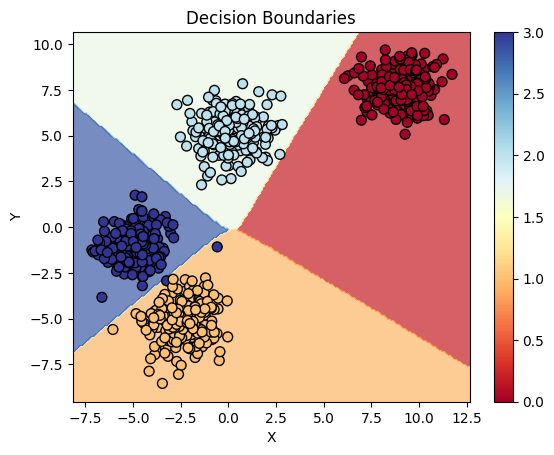

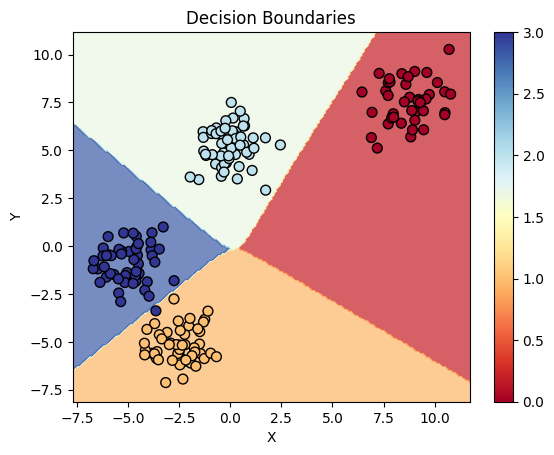

In [7]:
CLASS_COUNT = 4
SEED = None

data, labels = make_blobs(n_samples=1000,
                               n_features=2,
                               centers=CLASS_COUNT,
                               cluster_std=1,
                               random_state=SEED)

data = torch.from_numpy(data).type(torch.float32)
labels = torch.from_numpy(labels).type(torch.LongTensor)

training_data, testing_data, training_label, testing_label = train_test_split(data, 
                                                                              labels, 
                                                                              test_size=0.2, 
                                                                              random_state=SEED)

model = Multiclass(input=training_data.shape[-1], output=CLASS_COUNT)
train_model(model, training_data, training_label, 1000, 0.01)
test_model(model, testing_data, testing_label)
plot_decision_boundaries(model, training_data, training_label)
plot_decision_boundaries(model, testing_data, testing_label)



In [276]:
t = torch.tensor([1, 1, 2])
print(len(t.shape))

1
